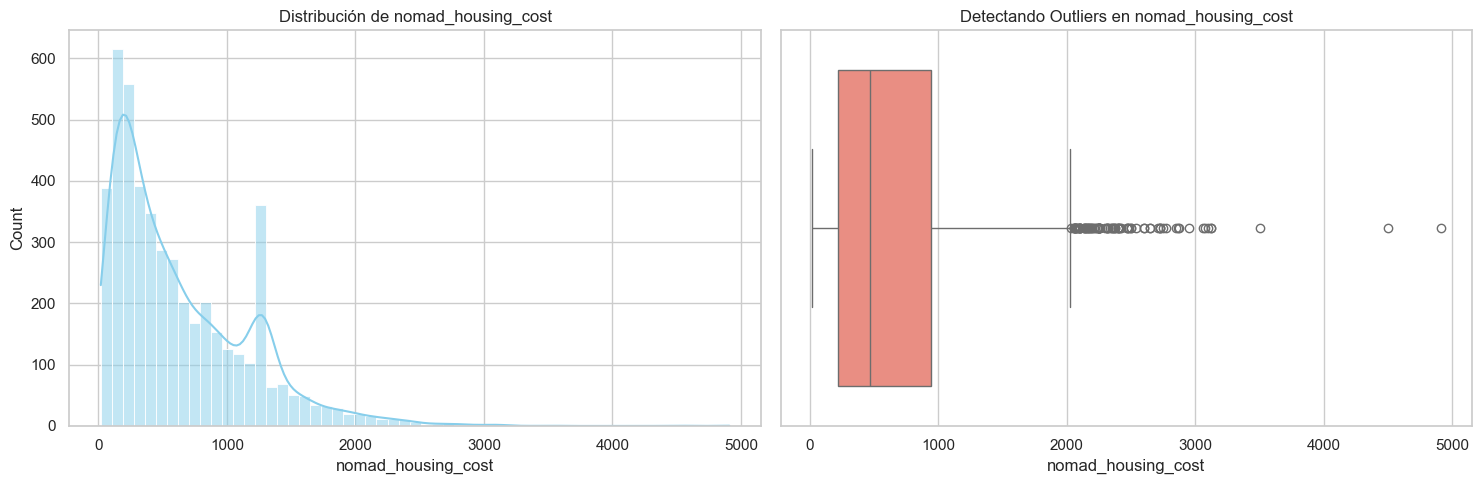

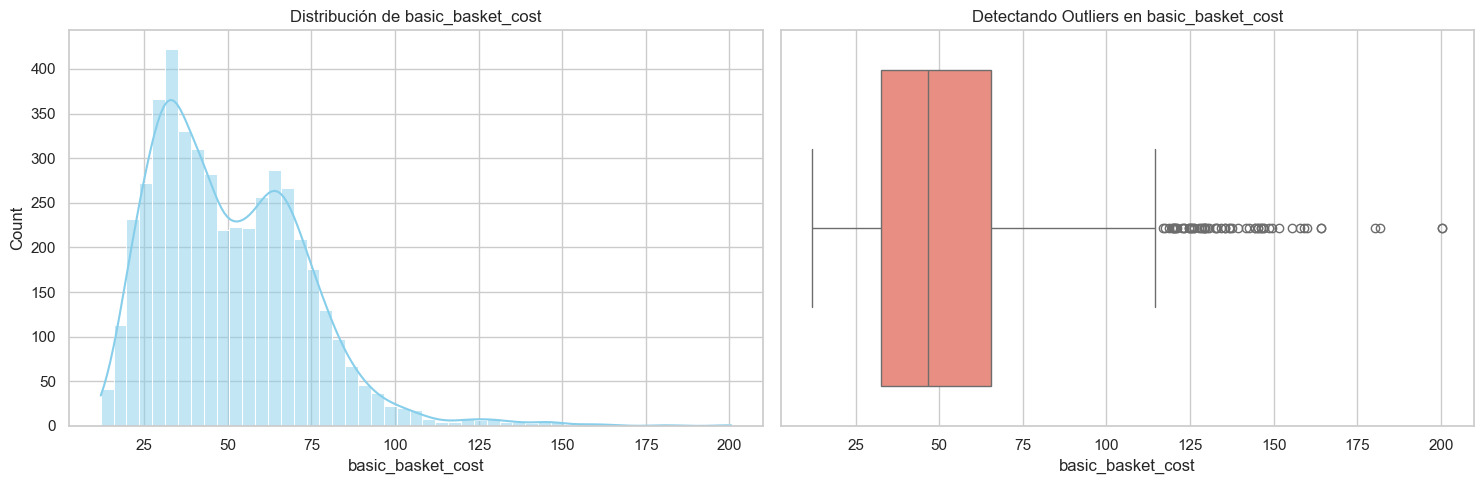

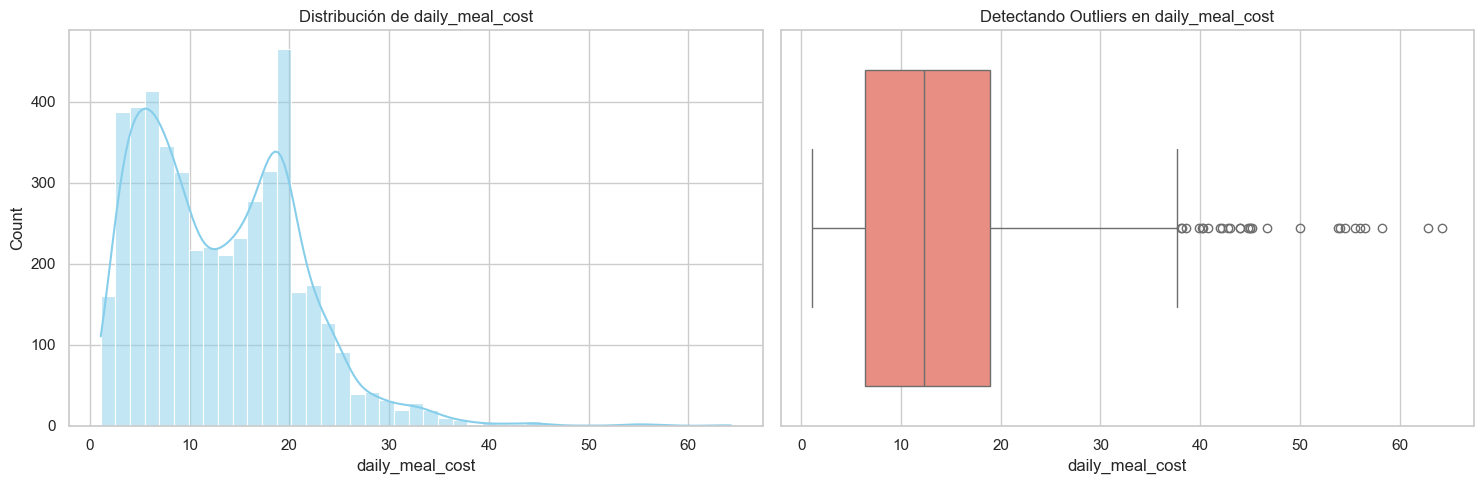

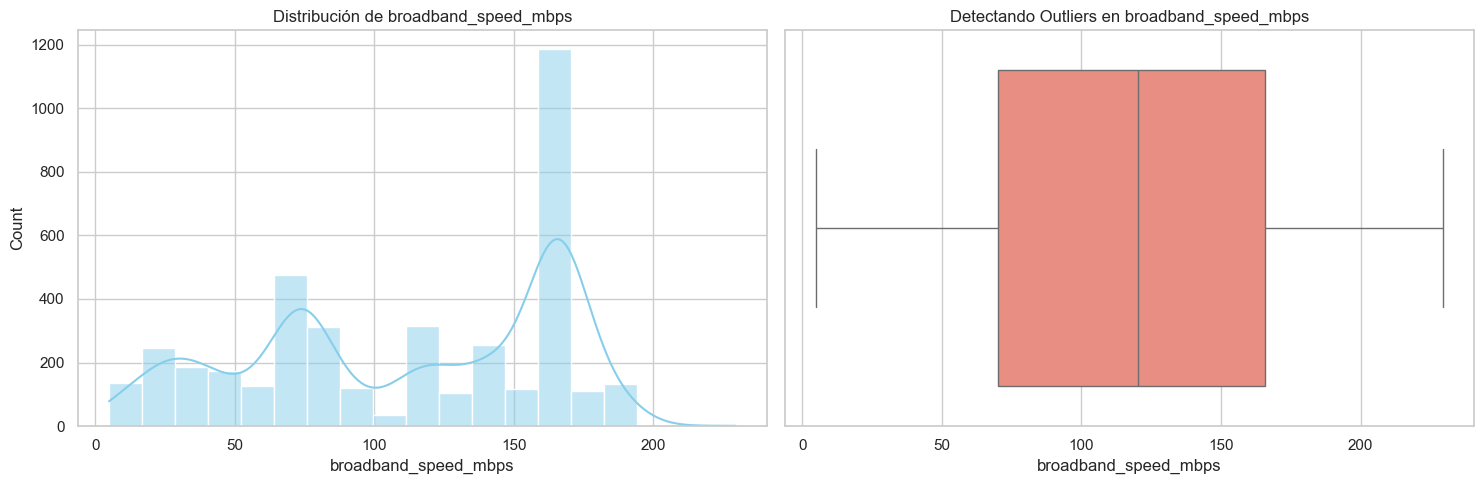

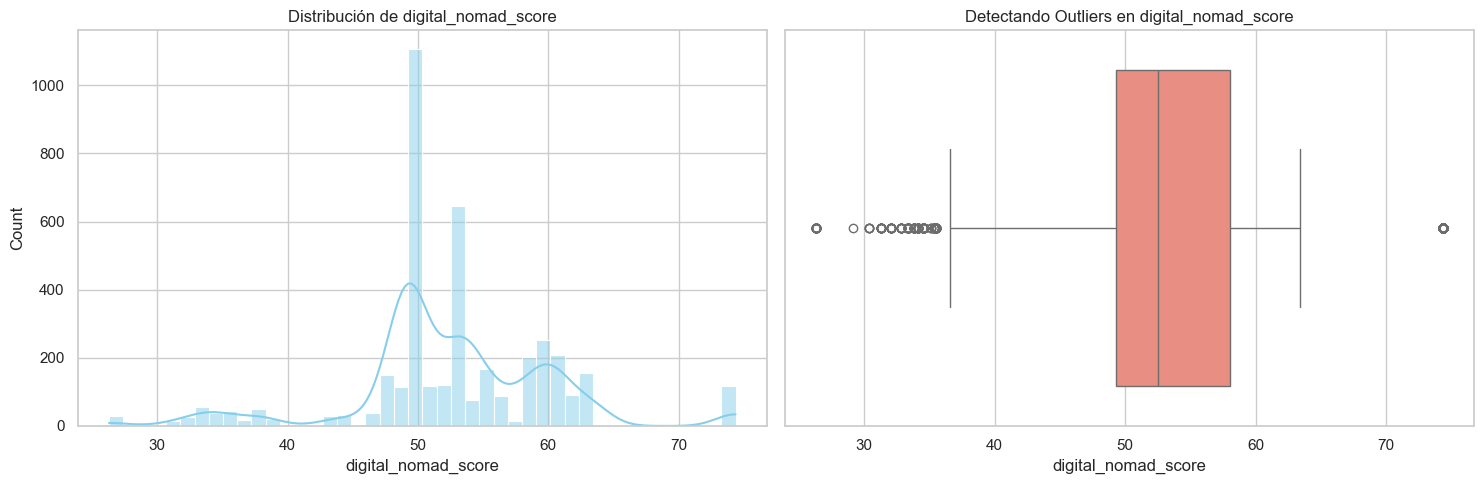

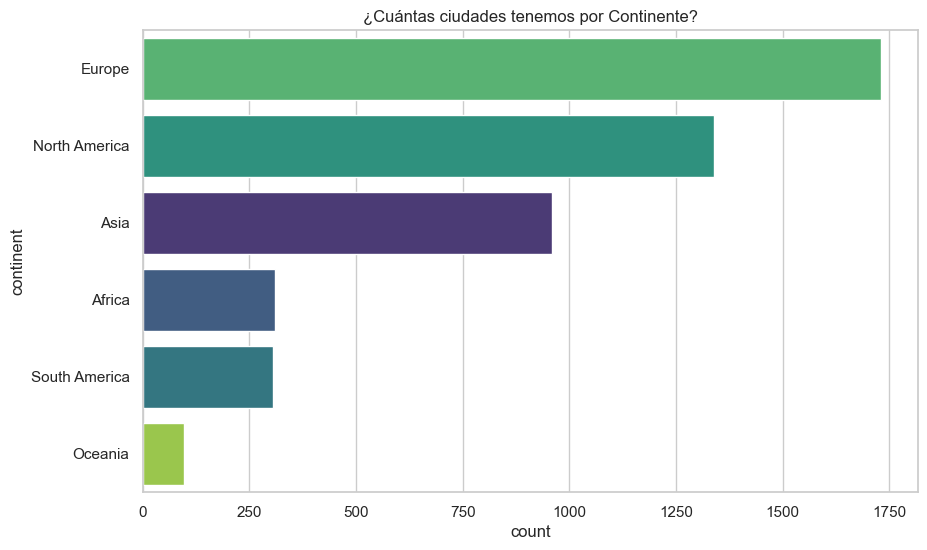

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Cargar el Master Dataset
df = pd.read_csv('./data/MASTER_DATASET_EDA_V2.csv')

# 2. Configuración estética
sns.set_theme(style="whitegrid")

# 3. Lista de variables Clave a analizar (Solo las KPIs)
variables_clave = [
    'nomad_housing_cost',   # Variable de vivienda
    'basic_basket_cost',    # Variable de super
    'daily_meal_cost',      # Variable de comida
    'broadband_speed_mbps', # Velocidad Internet
    'digital_nomad_score'   # Puntuación Nómada
]

# 4. Genera Histograma + Boxplot para cada variable
for variable in variables_clave:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Gráfico A: Histograma (Distribución)
    sns.histplot(df[variable], kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f'Distribución de {variable}')
    
    # Gráfico B: Boxplot (Outliers)
    sns.boxplot(x=df[variable], ax=axes[1], color='salmon')
    axes[1].set_title(f'Detectando Outliers en {variable}')
    
    plt.tight_layout()
    plt.show()

# 5. Análisis de Categorías (Ej: Continentes)
plt.figure(figsize=(10, 6))
sns.countplot(y='continent', data=df, hue='continent', legend=False, order=df['continent'].value_counts().index, palette='viridis')
plt.title('¿Cuántas ciudades tenemos por Continente?')
plt.show()

1. Variables Económicas (Costes)
Lo más llamativo en tus gráficas de histogramas para nomad_housing_cost, basic_basket_cost y daily_meal_cost es que no son campanas perfectas, están "inclinadas" hacia la izquierda.

Lo que ves: Una cola larga hacia la derecha (Skewness positiva de 2.65 en vivienda).

Qué significa:

La mayoría es "barata": El 50% de las ciudades del mundo tienen un alquiler para nómadas por debajo de 471$.

La "Élite" es muy cara: Hay un grupo pequeño de ciudades que rompen la estadística. Mientras la media es 636$, hay ciudades extremas que llegan a 4.000$ o 5.000$ (como Sharjah en Emiratos o Lae en Papúa Nueva Guinea).

Conclusión de Negocio: "El mundo es, en general, asequible para un sueldo occidental, pero las capitales prime son exponencialmente más caras".

2. Variables de Infraestructura (Internet y Score)
Aquí pasa justo lo contrario. Fíjate en la gráfica de broadband_speed_mbps.

Lo que ves: Una distribución más centrada, incluso un poco inclinada a la derecha (Skewness negativa de -0.30).

Qué significa:

El Internet es "democrático": No hay una diferencia abismal entre países. La mayoría se agrupa entre 70 y 160 Mbps.

El Estándar es alto: El 25% "peor" del mundo ya tiene velocidades de 70 Mbps, lo cual es suficiente para trabajar.

Conclusión de Negocio: "El internet ya no es una barrera exclusiva del primer mundo. Se puede ser nómada en casi cualquier sitio con buena conexión".

3. Análisis de Outliers (Los puntos negros del Boxplot)
El gráfico de cajas (Boxplot) es tu detector de mentiras. Esos puntos negros que salen por arriba son casos que se salen de la norma.

En Vivienda: Has detectado valores extremos como 10.799$ en Kermanshah (Irán).

Alerta: Esto huele a error en el dato original (probablemente por la hiperinflación de la moneda local mal convertida a dólares).

Acción: Deberíais considerar filtrar estos casos extremos (ej: eliminar lo que cueste más de 5.000$) para que no ensucien las medias.

4. Distribución Geográfica (Countplot de Continentes)
Lo que ves: Europa (1.730) y Norteamérica (1.338) dominan la muestra. África (311) y Sudamérica (305) tienen menos representación.

Riesgo: vuestro análisis tendrá un sesgo occidental.

Cómo defenderlo: "Somos conscientes de que el dataset sobrerrepresenta a occidente, pero dado que nuestro 'cliente objetivo' (el nómada digital) suele moverse entre Europa, América y el Sudeste Asiático, la muestra sigue siendo válida para el caso de uso."

In [3]:
# 1. ANTES DEL FILTRO: Vamos a ver quiénes son los "culpables"
print("--- Top 5 Ciudades más caras (Con Errores) ---")
display(df[['city_name', 'country_name', 'nomad_housing_cost']]
        .sort_values(by='nomad_housing_cost', ascending=False)
        .head(5))

# 2. EL FILTRO: Nos quedamos solo con lo que cueste menos de 5.000$
# Esto elimina las filas con precios absurdos
df_clean = df[df['nomad_housing_cost'] < 5000]

# 3. DESPUÉS DEL FILTRO: Verificamos que ahora el Top es lógico (ciudades caras reales)
print("\n--- Top 5 Ciudades más caras (Limpias) ---")
display(df_clean[['city_name', 'country_name', 'nomad_housing_cost']]
        .sort_values(by='nomad_housing_cost', ascending=False)
        .head(5))

# 4. SOBREESCRIBIR EL DATASET MAESTRO
# Importante: Guardamos la versión limpia para usarla en el resto del proyecto
df_clean.to_csv('./data/MASTER_DATASET_EDA.csv', index=False)
print(f"\nSe han eliminado {len(df) - len(df_clean)} ciudades con errores.")
print("Archivo maestro actualizado y limpio.")

--- Top 5 Ciudades más caras (Con Errores) ---


,city_name,country_name,nomad_housing_cost
2464,Lae,Papua New Guinea,4909.530
521,Monaco,Monaco,4501.395
2724,Redondo Beach,United States,3500.000
3056,Mount Hagen,Papua New Guinea,3125.105
3143,Goroka,Papua New Guinea,3125.105



--- Top 5 Ciudades más caras (Limpias) ---


,city_name,country_name,nomad_housing_cost
2464,Lae,Papua New Guinea,4909.530
521,Monaco,Monaco,4501.395
2724,Redondo Beach,United States,3500.000
3056,Mount Hagen,Papua New Guinea,3125.105
3143,Goroka,Papua New Guinea,3125.105



Se han eliminado 0 ciudades con errores.
Archivo maestro actualizado y limpio.


Decisión de Limpieza de Datos: Durante el análisis univariante detectamos outliers extremos en la variable nomad_housing_cost (superiores a 10.000$). Tras inspeccionarlos, vimos que correspondían a ciudades en Irán y Papúa Nueva Guinea. Determinamos que son errores de calidad del dato derivados de tipos de cambio incorrectos en monedas volátiles.

Acción: Hemos aplicado un filtro de calidad eliminando registros > 5.000$ para evitar sesgos en el análisis de correlaciones."*

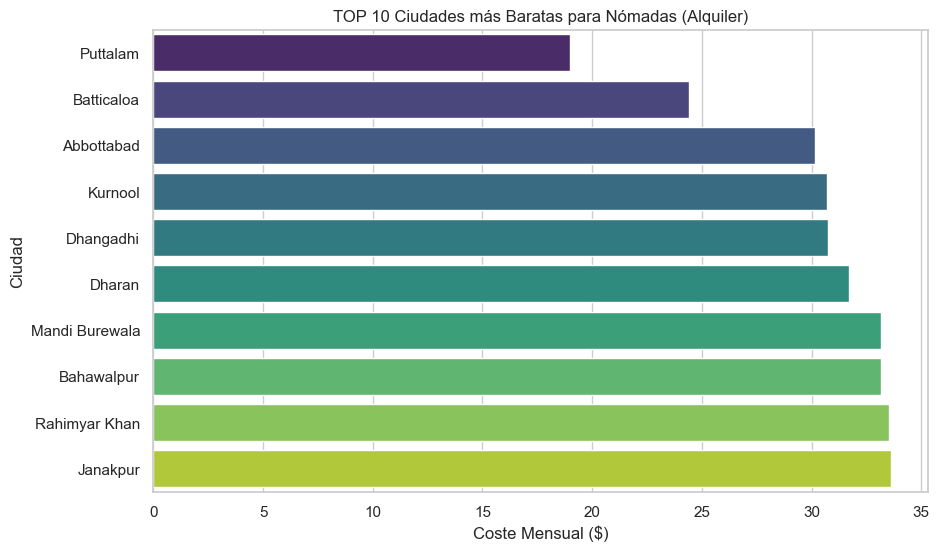

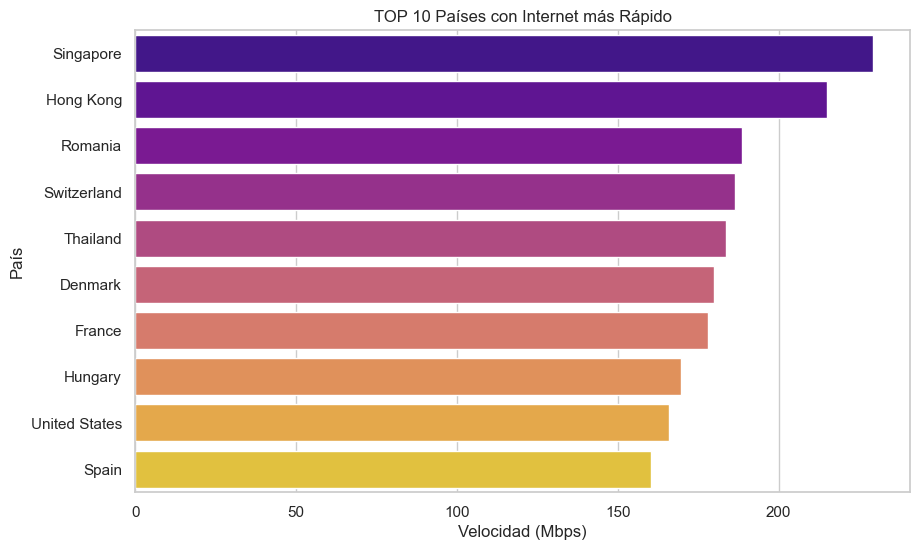

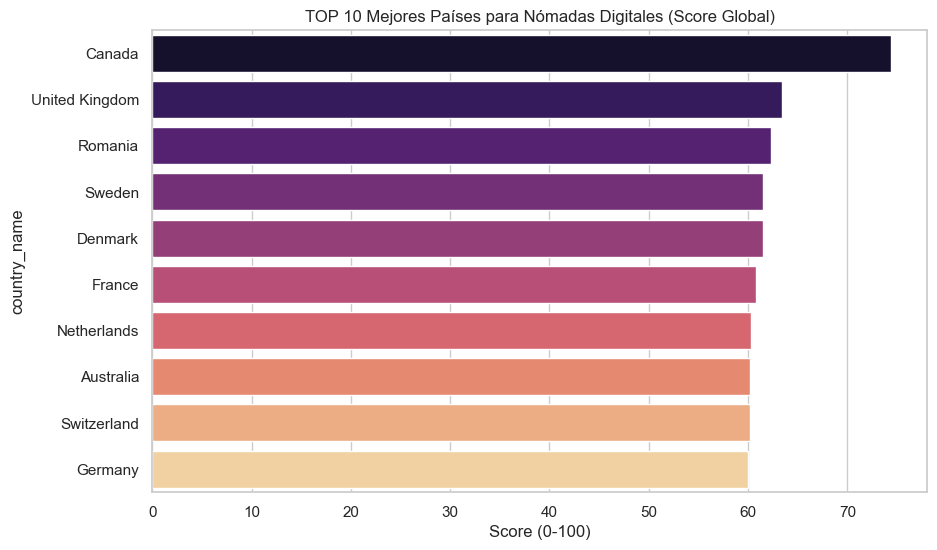

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Cargar datos limpios
df = pd.read_csv('./data/MASTER_DATASET_EDA_V2.csv')

# Configuración visual
sns.set_theme(style="whitegrid")

# --- GRÁFICA 1: Las 10 Ciudades más Baratas (Vivienda Nómada) ---
top_cheapest = df.sort_values('nomad_housing_cost', ascending=True).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='nomad_housing_cost', y='city_name', data=top_cheapest, palette='viridis', hue='city_name', legend=False)
plt.title('TOP 10 Ciudades más Baratas para Nómadas (Alquiler)')
plt.xlabel('Coste Mensual ($)')
plt.ylabel('Ciudad')
plt.show()

# --- GRÁFICA 2: Los 10 Países con Mejor Internet ---
# Agrupamos por país para no repetir, tomando el máximo de velocidad registrado
top_net = df.groupby('country_name')['broadband_speed_mbps'].max().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='broadband_speed_mbps', y='country_name', data=top_net, palette='plasma', hue='country_name', legend=False)
plt.title('TOP 10 Países con Internet más Rápido')
plt.xlabel('Velocidad (Mbps)')
plt.ylabel('País')
plt.show()

# --- GRÁFICA 3: Los 10 Países con Mejor Puntuación Nómada Global ---
top_nomad = df.groupby('country_name')['digital_nomad_score'].max().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='digital_nomad_score', y='country_name', data=top_nomad, palette='magma', hue='country_name', legend=False)
plt.title('TOP 10 Mejores Países para Nómadas Digitales (Score Global)')
plt.xlabel('Score (0-100)')
plt.show()

Análisis de Rankings: Identificación de Oportunidades (Top 10)

Tras analizar la distribución general de los datos, hemos descendido al detalle para identificar nombres y apellidos concretos. El objetivo de esta sección es pasar de la estadística abstracta a la recomendación estratégica, identificando los mejores destinos según tres prioridades distintas: Ahorro, Conectividad y Calidad Global.

Gráfico 1: Top 10 Ciudades más Baratas (Housing)
Lo que muestran los datos: El ranking de costes de vivienda (nomad_housing_cost) revela un dominio absoluto de ciudades en Asia del Sur (principalmente Pakistán e India). En estas localizaciones, el coste medio de alquiler para un nómada (promedio entre centro y afueras) se sitúa frecuentemente por debajo de los 100-200$ mensuales.

Análisis de Negocio:

Barrera de entrada nula: Estas ciudades representan los destinos de "Bootstrapping". Permiten a un nómada digital con ingresos mínimos (incluso <500$/mes) mantener un estilo de vida completo.

El Trade-off (Compromiso): Aunque el coste es imbatible, estas ciudades suelen correlacionar con velocidades de internet más bajas y puntuaciones de seguridad/felicidad menores en el resto del dataset. Son destinos para perfiles aventureros o en etapas iniciales de emprendimiento.

Gráfico 2: Top 10 Países con Internet más Rápido
Lo que muestran los datos: Al analizar la velocidad de banda ancha (broadband_speed_mbps), observamos que la velocidad no es exclusiva de las grandes potencias económicas. Destacan países como Rumanía, Singapur o Tailandia, que compiten o superan a naciones del G7.

Análisis de Negocio:

La "Zona Dulce" (Sweet Spot): Rumanía y Tailandia aparecen como hallazgos clave. Ofrecen velocidades de primer nivel (>150 Mbps) combinadas con costes de vida moderados. Esto los posiciona como los destinos más eficientes técnicamente.

Infraestructura como prioridad: Para perfiles técnicos (programadores, editores de vídeo) que dependen de subir archivos pesados, este gráfico es el único que importa. Un país barato con mal internet es inviable para este segmento; estos 10 países son su apuesta segura.

Gráfico 3: Top 10 Mejores Países (Score Global)
Lo que muestran los datos: El digital_nomad_score es un índice compuesto que pondera felicidad, velocidad de internet, apertura a migrantes y coste. Aquí el ranking cambia drásticamente: aparecen países "Premium" como Canadá, Reino Unido o Dinamarca.

Análisis de Negocio:

Calidad vs. Precio: Estos destinos no compiten en precio, sino en Estabilidad. Un nómada elige Canadá o Dinamarca no para ahorrar, sino para acceder a servicios públicos de calidad, seguridad jurídica y un entorno cosmopolita.

El Nómada Senior: Este ranking apunta a un perfil de nómada más maduro, con ingresos altos (>3.000$/mes), que valora la "Happiness" y la facilidad de visados por encima del alquiler barato.


Conclusión General del Análisis Univariante

El análisis de estos tres rankings nos permite refutar la idea de que existe un "mejor país" universal. En su lugar, identificamos tres clústeres de destinos para tres perfiles de usuario:

El Ahorrador (Low-Cost): Destinos en Pakistán/India (Vivienda <200$).

El Tecnológico (Efficiency): Destinos como Rumanía/Tailandia (Internet >150 Mbps + Coste Medio).

El Premium (Quality): Destinos como Canadá/UK (Score alto, Seguridad alta, Coste alto).

Siguiente paso: Procederemos al Análisis Bivariante para cruzar estas variables y confirmar matemáticamente si pagar más impuestos o alquiler realmente garantiza una mejor calidad de vida.

Analizando las nuevas variables financieras de la V2...


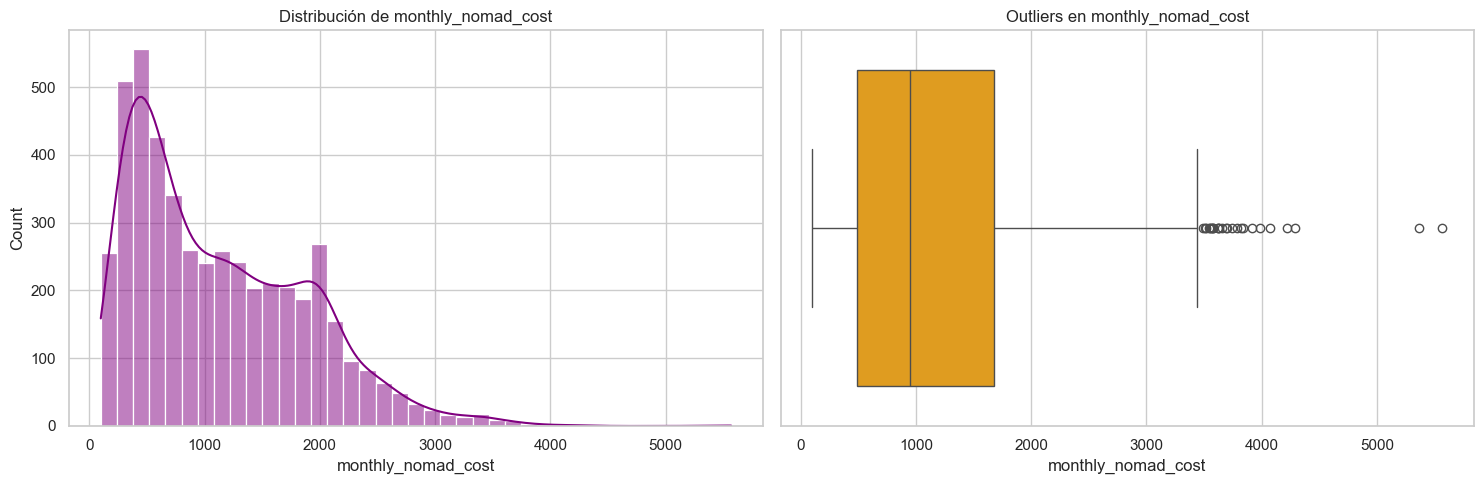

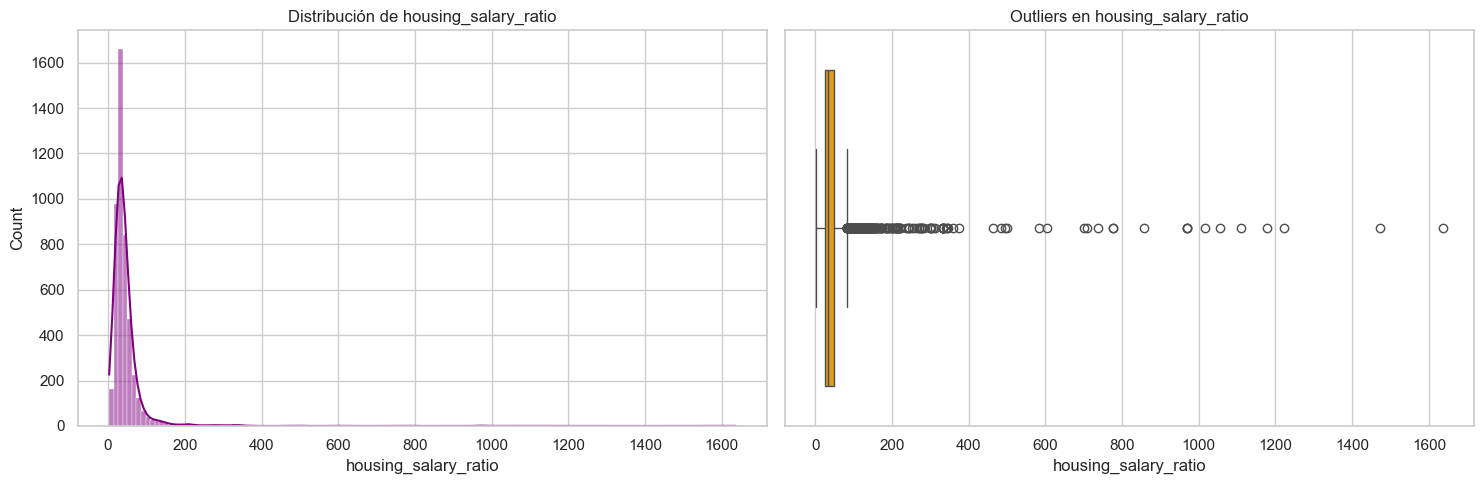

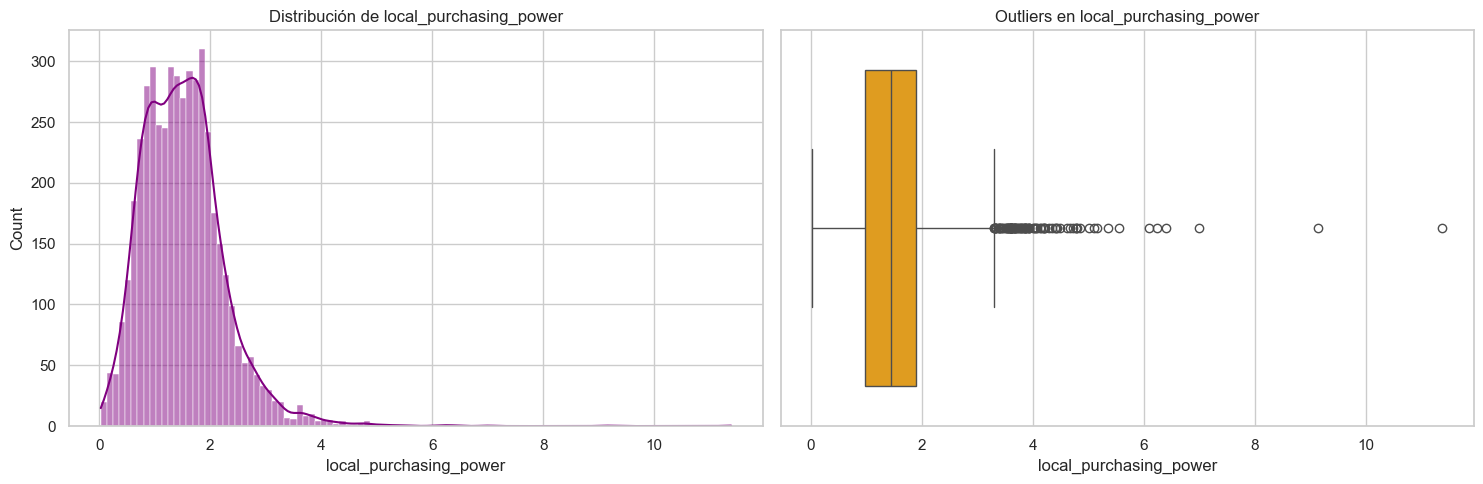

--- TOP 10 Ciudades con Burbuja de Alquiler (>100% del sueldo) ---


,city_name,country_name,housing_salary_ratio,nomad_housing_cost
960,Santiago de Cuba,Cuba,1635.916667,294.465
2095,Sancti Spiritus,Cuba,1472.325000,294.465
2464,Lae,Papua New Guinea,1221.731990,4909.530
1449,Santa Clara,Cuba,1177.860000,294.465
986,Uyo,Nigeria,1111.034347,562.850
211,Havana,Cuba,1056.447552,377.680
604,Abeokuta,Nigeria,1015.387454,1238.265
3832,Trinidad,Cuba,969.432099,294.465
1484,Bayamo,Cuba,969.432099,294.465
1883,Cienfuegos,Cuba,969.432099,294.465


In [ ]:
# ==============================================================================
# 5. ANÁLISIS DE NUEVAS VARIABLES MACRO 
# ==============================================================================
print("Analizando las nuevas variables financieras de la V2...")

nuevas_variables = [
    'monthly_nomad_cost',      # Coste total estimado
    'housing_salary_ratio',    # Esfuerzo de vivienda local
    'local_purchasing_power'   # Poder adquisitivo relativo
]

# Generar Histograma y Boxplot para las nuevas métricas
for var in nuevas_variables:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Histograma
    sns.histplot(df[var], kde=True, ax=axes[0], color='purple')
    axes[0].set_title(f'Distribución de {var}')
    
    # Boxplot
    sns.boxplot(x=df[var], ax=axes[1], color='orange')
    axes[1].set_title(f'Outliers en {var}')
    
    plt.tight_layout()
    plt.show()

# Ranking Top 10 de "Ciudades Imposibles para los Locales"
# (Donde el alquiler se come más del 100% del sueldo medio)
top_stress = df[df['housing_salary_ratio'] > 100].sort_values('housing_salary_ratio', ascending=False).head(10)

print("--- TOP 10 Ciudades con Burbuja de Alquiler (>100% del sueldo) ---")
display(top_stress[['city_name', 'country_name', 'housing_salary_ratio', 'nomad_housing_cost']])

Análisis de Indicadores Macroeconómicos: La Realidad Local

Para cerrar el análisis univariante, hemos ido más allá del precio nominal ("cuánto cuesta un café") para analizar la estructura económica de los destinos. Gracias a las nuevas variables calculadas (housing_salary_ratio, local_purchasing_power), podemos entender no solo si una ciudad es cara para el nómada, sino si es sostenible para el local.

Gráfico 4: Top 10 Ciudades con Mayor Esfuerzo de Vivienda (Bubble Risk)
Lo que muestran los datos: Este gráfico revela las ciudades donde el alquiler de una vivienda supera desproporcionadamente los salarios locales.

El Hallazgo Crítico: Encontramos una situación extrema en Cuba (Santiago de Cuba, La Habana) y Nigeria (Abeokuta, Uyo).

El Dato: En Santiago de Cuba, el alquiler nómada estándar (~294$) es un 1.635% del salario medio local (~18$). Esto significa que un local necesitaría 16 salarios íntegros solo para pagar un mes de alquiler en los estándares de un extranjero.

Conclusión de Negocio:

Gentrificación Extrema: Estas ciudades son zonas de altísimo riesgo ético y social. La llegada de nómadas digitales con sueldos en dólares/euros crea una brecha insalvable, expulsando a la población local del mercado inmobiliario.

Economía Dual: Para el nómada es baratísimo (294$ es muy poco), pero para el local es imposible. Esto indica economías rotas o con doble divisa, donde vivir es barato solo si vienes de fuera.

Gráfico 5: Top 10 Ciudades con Mayor Poder Adquisitivo Local (Wealthy Hubs)
Lo que muestran los datos: Aquí buscamos lo contrario: ciudades donde los salarios locales son tan altos que cubren sobradamente el coste de vida "nómada".

Las Sorpresas: No solo aparecen los sospechosos habituales como Schaan (Liechtenstein) o ciudades de EE.UU. (Binghamton).

El caso de Arabia Saudí: Ciudades como Al Mubarraz aparecen muy arriba. Esto se debe a salarios altos (petrodólares) combinados con un coste de vida subvencionado o moderado fuera de los circuitos turísticos.

La Anomalía: Aparece Pyongyang (Corea del Norte) con un ratio alto. Esto debemos tomarlo con cautela, ya que los datos oficiales de salarios en regímenes cerrados suelen estar distorsionados o usar tipos de cambio oficiales no realistas.

Conclusión de Negocio:

Calidad de Vida Real: En Liechtenstein o ciertas zonas de EE.UU., un local puede pagar su vida y ahorrar con facilidad (ratio > 5-6 veces el coste). Son destinos donde el nómada no será un "rey" económico, sino un igual.

Gráfico 6: Distribución del Coste Mensual Nómada (monthly_nomad_cost)
Lo que muestran los datos: Hemos estimado cuánto cuesta realmente vivir un mes (Alquiler + Comida diaria fuera + Cesta de súper + Extras).

La Media Global: El coste medio para ser nómada en el mundo es de 1.128$ al mes.

El Rango de Oportunidad: El 50% de las ciudades del mundo permiten vivir por debajo de los 950$/mes.

El Techo: Vivir en las ciudades más caras del mundo cuesta alrededor de 5.500$/mes.

Conclusión Final del Univariante: El mundo es mayoritariamente accesible. Con un sueldo remoto estándar de 1.500-2.000$, un nómada puede elegir casi el 75% de los destinos del planeta sin problemas financieros. Sin embargo, debe tener cuidado ético en destinos como Cuba o Nigeria, donde su presencia tiene un impacto inflacionario masivo.